In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [43]:
lg_xml = pd.read_xml('region4-00101-02-21-legends.xml', xpath='./regions/*', encoding='CP437')
lg_xml.set_index('id', inplace=True)

In [44]:
lgp_xml = pd.read_xml('region4-00101-02-21-legends_plus.xml', xpath='./regions/*', encoding='CP437')
lgp_xml.set_index('id', inplace=True)

In [45]:
regions = lg_xml.join(lgp_xml)

In [46]:
def getPoly(coorText):
    coordinates = list()
    for coord in coorText.split('|'):
        if coord:
            sp = coord.split(',')
            coordinates.append((int(sp[0]),int(sp[1])))

    return np.array(coordinates)


In [47]:
regions['coords'] = regions['coords'].apply(getPoly)

In [74]:
oceanCoords = regions[regions['type']=='Ocean']['coords'][0].transpose()
frameSize = (oceanCoords[0].min(), oceanCoords[0].max(), oceanCoords[1].min(), oceanCoords[1].max())

In [72]:
#frame has form (xMin, xMax, yMin, yMax)
def mkImg(coordintes, frame):
    img = np.zeros((frame[1]-frame[0]+1,frame[3]-frame[2]+1))
    for x, y in coordintes:
        img[x-frame[0]][y-frame[2]] = 1
    return img

In [73]:
regions['img'] = regions['coords'].apply(mkImg, args=(frameSize,))

In [25]:
biomeColor = {'Ocean':'blue', 'Hills':'gray', 'Grassland':'green', 'Wetland':'purple', 'Desert':'yellow', 'Mountains':'black',
       'Forest':'darkgreen', 'Tundra':'steelblue', 'Glacier':'white'}

In [28]:
regions['color'] = regions['type'].apply(lambda x: biomeColor[x])

In [29]:
regions.head()

,name,type,coords,evilness,force_id,color
id,,,,,,
0,the gulf of bodies,Ocean,"[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5...",neutral,NaN,blue
1,the hill of ferocity,Hills,"[(10, 1)]",neutral,NaN,gray
2,the fair plains,Grassland,"[(10, 2), (11, 2), (11, 3), (11, 4), (11, 5), ...",neutral,NaN,green
3,the violent swamp,Wetland,"[(26, 2), (27, 1), (27, 2), (27, 3), (27, 4), ...",neutral,NaN,purple
4,the fierce hills,Hills,"[(1, 6), (1, 8), (1, 10), (2, 6), (2, 7), (2, ...",neutral,NaN,gray


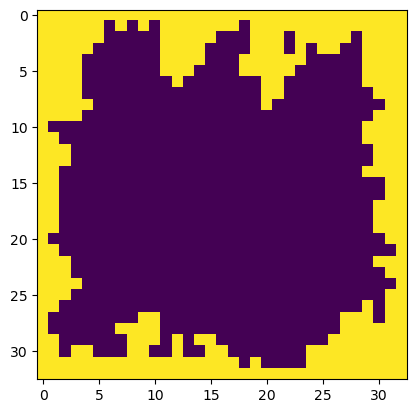

In [83]:
plt.imshow(regions[regions['type']=='Ocean']['img'][0])
plt.show()
    

In [37]:
np.transpose(regions['coords'][0])[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,
        9,  9,  9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12,
       12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15,
       15, 15, 16, 16, 16, 16, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 19,
       19, 19, 19, 19, 20

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 0., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])